In [64]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances

#For plotting
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import scatter_matrix

from itertools import chain

In [2]:
# Get time series data:
data = pd.read_csv('GamesDataAll.csv')

# Make percentile into number and clear "-"
data = data.replace(to_replace='%', value='', regex=True).replace({'-':'NaN'})#.replace(to_replace='Inf', value=+100, regex=True)
#data['Perc_Gain'] = data['Perc_Gain']/100

data.head()

,App_id,Name,Avg_Players,Gain,Perc_Gain,Peak_Players,Last 30 Days,April 2021,March 2021,February 2021,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
0,730,Counter-Strike: Global Offensive,1,0,0,0,695044.47,723346.52,740927.82,741013.24,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57
1,730,Counter-Strike: Global Offensive,0,1,0,0,-28302.0,-17581.31,-85.42,-2196.42,...,46.11,-1412.84,1208.51,2084.83,-54.71,3394.62,-5261.27,525.36,14542.81,NaN
2,730,Counter-Strike: Global Offensive,0,0,1,0,-3.91,-2.37,-0.01,-0.30,...,+0.29,-8.13,+7.48,+14.81,-0.39,+31.61,-32.88,+3.39,+1559.43,NaN
3,730,Counter-Strike: Global Offensive,0,0,0,1,1119102,1148077,1198581,1123485,...,31966,32166,35238,31359,27553,50533,20850,36057,52261,1642
4,570,Dota 2,1,0,0,0,413025.27,413784.97,390412.76,404832.13,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05


In [3]:
# Get Perc_Gain.
p_gain = data.loc[data['Perc_Gain']==1]
p_gain = p_gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
p_gain_pure = p_gain.drop(columns=['App_id', 'Name']).astype(float)

p_gain.sample(5)

,App_id,Name,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
2578,567640,Danganronpa V3: Killing Harmony,-13.53,-29.02,-17.51,+24.24,-6.15,+96.85,-14.90,-25.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23026,743650,Quake Champions PTS,-50.25,+121.88,-4.29,-33.55,+33.99,-45.64,+0.10,+31.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32618,647000,RoBros,+45.68,+47.53,-34.93,-15.56,+11.06,+5.77,-34.35,+44.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,443110,Armored Warfare,-0.10,+7.94,+3.63,+0.10,+0.52,-14.92,+19.46,+30.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6446,1100760,Football Manager 2020 Editor,-1.93,-13.68,-13.30,-11.55,-39.87,-35.91,-16.77,-4.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Get Avg_Players.
avg_players = data.loc[data['Avg_Players']==1]
avg_players = avg_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
avg_pure = avg_players.drop(columns=['App_id', 'Name']).astype(float)

avg_players.sample(5)

,App_id,Name,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
12144,1104640,New Frontier,32.16,30.72,36.48,36.61,39.58,44.59,47.85,41.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40484,277390,VIDEOBALL,1.07,0.94,0.54,0.34,0.28,0.5,0.21,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10724,1450120,The Legend of Heroes: Sen no Kiseki I KAI -Tho...,40.25,56.15,88.18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10036,609150,STAR OCEAN™ - THE LAST HOPE™ - 4K & Full HD Re...,46.69,46.19,23.42,33.1,18.49,18.42,24.77,20.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32904,459080,YIIK: A Postmodern RPG,1.88,0.99,1.14,2.78,1.61,1.16,1.37,1.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Add columns of max and mean and sort the dataframe
avg_players['max'] = avg_pure.max(axis=1)
avg_players['mean'] = avg_pure.mean(axis=1)

In [6]:
features = pd.read_csv('games-features.csv')
features = features.drop_duplicates(subset=['ResponseID','ResponseName'], keep='first', inplace=False, ignore_index=False)
features = features.drop(columns=['QueryID', 'QueryName','RequiredAge'])
features = features.rename(columns={'ResponseID':'App_id','ResponseName':'Name'}, errors="raise")

data_craig = pd.merge(features, avg_players[['App_id','max','mean']], how='inner', on=['App_id'])
data_craig = data_craig.loc[data_craig['GenreIsNonGame']==False]
data_craig.sort_values(by=['max'], ascending=False, inplace=True)#.reset_index(drop=True)"

#grades = [1]*50+[2]*50+[3]*400+[4]*500+[5]*2450
#avg_graded = avg_players.loc[avg_players['max']>=1].copy()
#data_craig['Grade'] = grades

data_craig.reset_index(drop=True).to_csv('CraigGamesData.csv')

In [8]:
data_craig

,App_id,Name,ReleaseDate,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,...,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText,max,mean
25,730,Counter-Strike: Global Offensive,Aug 21 2012,0,1,0,83,8,1,1427633,...,Czech Danish Dutch English* Finnish French Ger...,http://blog.counter-strike.net/,Minimum:OS: Windows(r) 7/Vista/XPProcessor: In...,,Minimum:OS: Ubuntu 12.04Processor: 64-bit Dual...,,Minimum:OS: MacOS X 10.6.6 or higherProcessor:...,,857604.22,316635.260189
22,570,Dota 2,Jul 9 2013,0,1,0,90,4,0,590480,...,Bulgarian Czech Danish Dutch English* Finnish ...,http://www.dota2.com/,Minimum:OS: Windows 7 or newerProcessor: Dual ...,,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,Minimum:OS: OS X Mavericks 10.9Processor: Dual...,,709178.26,452757.727453
2450,377160,Fallout 4,Nov 9 2015,0,1,7,84,10,1,72929,...,English* French* Italian* German* Spanish* Pol...,http://www.fallout4.com,Minimum:OS: Windows 7/8/10 (64-bit OS required...,Recommended:OS: Windows 7/8/10 (64-bit OS requ...,,,,,226297.83,22651.106970
1467,271590,Grand Theft Auto V,Apr 13 2015,0,1,0,96,9,7,136846,...,English* French Italian German Spanish Korean ...,http://www.rockstargames.com/V/,Minimum:OS: Windows 8.1 64 Bit Windows 8 64 Bi...,Recommended:OS: Windows 8.1 64 Bit Windows 8 6...,,,,,192714.01,64764.257671
1288,252490,Rust,Dec 11 2013,0,1,0,0,1,2,145688,...,English* French* Italian* German* Spanish* Jap...,http://www.playrust.com/,Minimum:OS: Windows 7 64bitProcessor: 2 ghzMem...,Recommended:OS: Windows 10 64bitProcessor: 3 g...,Minimum:Memory: 8 GB RAMStorage: 8 GB availabl...,,Minimum:OS: OS X Lion 10.7Processor: 2 ghzMemo...,Recommended:OS: OS X MavericksProcessor: 3 ghz...,142117.25,34070.407640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,374420,Questria: Rise of the Robot Skullfaces,Nov 9 2015,0,1,0,0,1,1,0,...,English**languages with full audio support,http://questriagame.com,Minimum:OS: Window XP +Processor: 2GHzMemory: ...,,,,Minimum:OS: 10.8+Processor: 2GHzMemory: 2 GB R...,,0.04,0.012857
2443,376620,Project Orion,TBD,0,1,0,0,1,0,0,...,English**languages with full audio support,https://www.projectoriongame.com,Minimum:OS: Windows(r) 7 64-bitProcessor: Inte...,Recommended:OS: Windows(r) 7 64-bitProcessor: ...,,,,,0.03,0.013333
3358,524610,Ceggtcher VR,Sep 27 2016,0,1,0,0,2,1,0,...,English,http://funnytwins.ru/,Minimum:OS: Windows(r) 7 SP1 Windows(r) 8.1 or...,,,,,,0.02,0.011429
3315,519630,Complete Figure Drawing Course HD: 054 - Formu...,Aug 22 2016,0,0,0,0,0,0,0,...,English**languages with full audio support,None,,,,,,,0.02,0.011667


In [68]:
ranks = [0,50,100,500,1000]
grade = list(range(1,len(ranks)+1))

a = np.array(ranks[1:]+[len(data_craig)] ) - np.array( [0] + ranks[1:])

grades = []

for i in range(len(grade)):
    grades.append( [grade[i]]*a[i] )
    
grades = list(chain(*grades))

In [173]:
#standard: a column name used to rank the games
#ranks: a list of rank cutoffs

def grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=(12,12)):
       
    grade = list(range(1,len(ranks)+1))
    a = np.array(ranks[1:]+[len(data_craig)] ) - np.array( [0] + ranks[1:])
    grades = []
    for i in range(len(grade)):
        grades.append( [grade[i]]*a[i] )    
    grades = list(chain(*grades))

    data_craig.sort_values(by=[standard], ascending=False, inplace=True)#.reset_index(drop=True)
    avg_graded = data_craig#.loc[data_craig[standard]>=1].copy()

    # Rank the games
    if plot_cutoff:
        print('Using '+str(standard)+' :')
        for i in ranks:
            print('The cutoff for top '+str(i)+' games is '+str(avg_graded.reset_index(drop=True)[standard][i]))

    cutoffs = [0] + [avg_graded.reset_index(drop=True)[standard][i] for i in ranks[::-1]]
    #counts  = avg_graded[standard].value_counts(bins=cutoffs, sort=False,dropna=False) 
    #print(counts)

    #avg_graded = avg_players.loc[avg_players[standard]>=1].copy()
    avg_graded['Grade'] = grades

    data_clean = avg_graded[[#'ReleaseDate', 
        'CategorySinglePlayer',
       'CategoryMultiplayer', 
       'GenreIsIndie', 
                         'GenreIsAction', 
                         'GenreIsAdventure', 
                         'GenreIsCasual',
       'GenreIsStrategy', 
                         'GenreIsRPG', 
                         'GenreIsSimulation','Grade']]

#threshold = .2
#data_clean = data_clean.drop(data_clean.mean(axis=0)[data_clean.mean(axis=0) < threshold].index.values,axis=1)

    data_clean.columns = ['Single', 'Multi', 'Indie',
       'Action', 'Adventure', 'Casual', 'Strategy',
       'RPG', 'Simulation', 'Grade']

    data_test = {}
    for i in grade:
        data_test[i] = data_clean.loc[data_clean['Grade']==i].drop(columns=['Grade'])
        
    if plot_figures:
        plt.figure(figsize=fig_size)
        for i in grade:
            plt.plot(data_test[i].columns,data_test[i].mean(),label='Grade '+str(i))

        plt.legend()
        plt.title('By max of Avg_players')
        plt.show()
    return data_test

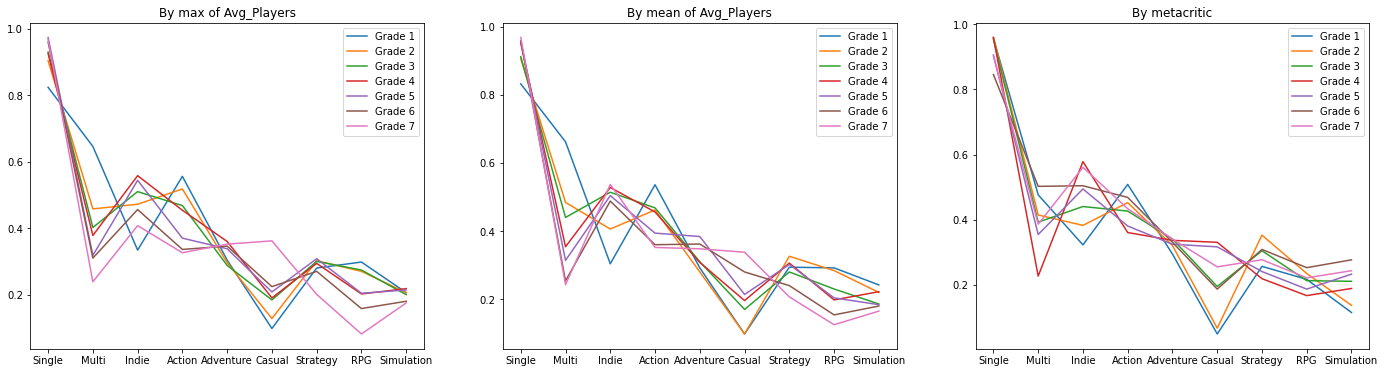

In [179]:
fig_size=(7,7)
ranks = list(np.arange(0,3500,500))
data_max = grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=False,fig_size=fig_size)
data_mean = grade_analysis(ranks,standard='mean', plot_cutoff=False,plot_figures=False,fig_size=fig_size)
data_meta = grade_analysis(ranks,standard='Metacritic', plot_cutoff=False,plot_figures=False,fig_size=fig_size)

fig,ax=plt.subplots(1,3,figsize=(24,6))

for i in list(range(1,len(ranks)+1)):    
    ax[0].plot(data_max[i].columns,data_max[i].mean(),label='Grade '+str(i))
    ax[1].plot(data_mean[i].columns,data_mean[i].mean(),label='Grade '+str(i))    
    ax[2].plot(data_meta[i].columns,data_meta[i].mean(),label='Grade '+str(i))
    
    ax[0].set_title('By max of Avg_Players')
    ax[1].set_title('By mean of Avg_Players')
    ax[2].set_title('By metacritic')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

KeyError: 1

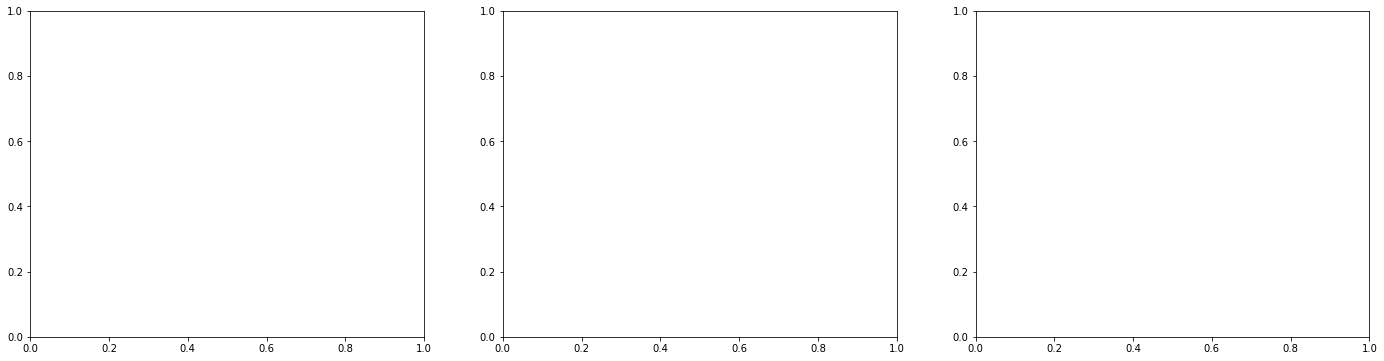

In [159]:
methods = ['max','mean','Metacritic']

grade_analysis_plot_all(methods,ranks)

In [165]:
ranks

[0, 500, 1000, 1500, 2000, 2500, 3000]

In [180]:
# This function is just for plotting. It plots different grade analysis at once: 
def grade_analysis_plot_all(methods,ranks,fig_size=(24,6)):
    fig,ax=plt.subplots(1,len(methods),figsize=fig_size)
    for j in range(len(methods)):
        data = grade_analysis(ranks,standard= methods[j], plot_figures=False).copy()
        for i in list(range(1,len(ranks)+1)):    
            ax[j].plot(data[i].columns,data[i].mean(),label='Grade '+str(i))
            ax[j].set_title('By '+str(methods[j]))
        ax[j].legend()
    plt.show()

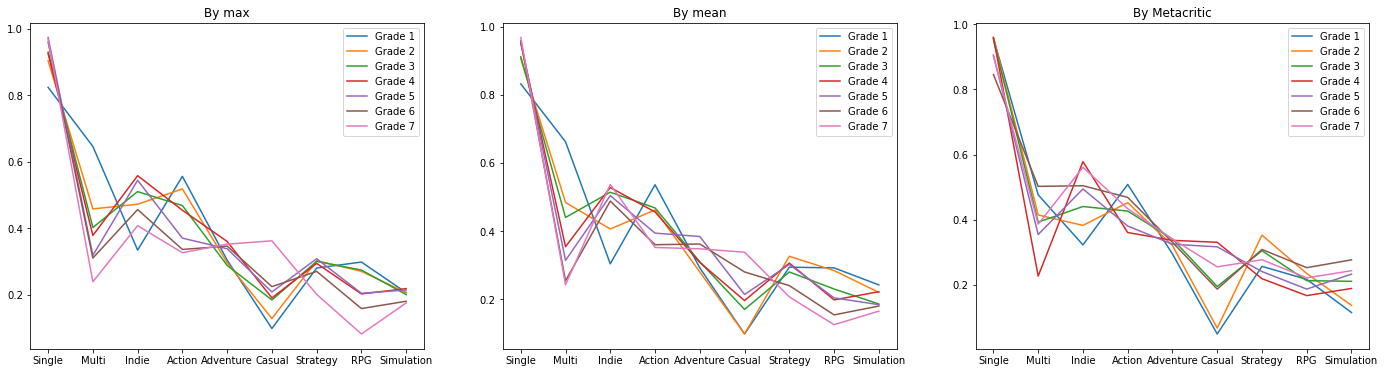

In [181]:
methods = ['max','mean','Metacritic']

grade_analysis_plot_all(methods,ranks,fig_size=(24,6))

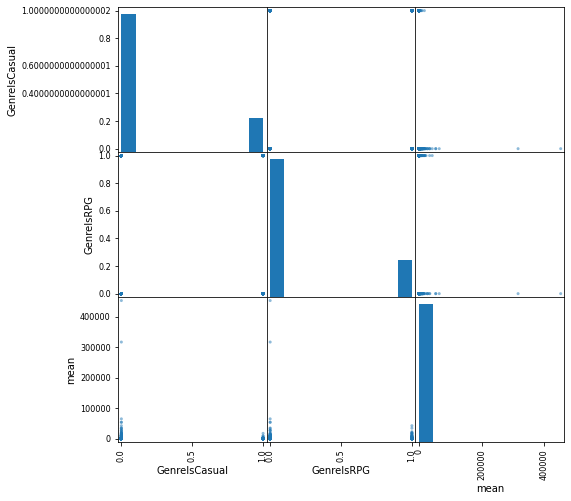

In [106]:
data_test = data_craig[[ #'RecommendationCount',
        #'CategorySinglePlayer',
       #'CategoryMultiplayer', 
#       'GenreIsIndie', 
#                       'GenreIsAction', 
#                        'GenreIsAdventure', 
                        'GenreIsCasual',
#       'GenreIsStrategy', 
                         'GenreIsRPG', 
#                        'GenreIsSimulation', 
       #'PriceFinal',
                        'mean']].astype(float)

scatter_matrix(data_test,figsize=(8,8))
plt.show()

In [109]:
data_craig.mean()

App_id                         284823.060234
DemoCount                           0.115901
DeveloperCount                      1.105909
DLCCount                            1.574650
Metacritic                         27.872110
MovieCount                          1.605481
PackageCount                        1.369112
RecommendationCount              3833.971453
PublisherCount                      1.069940
ScreenshotCount                    11.206109
SteamSpyOwners                 506934.369112
SteamSpyOwnersVariance          12065.960034
SteamSpyPlayersEstimate        347759.336283
SteamSpyPlayersVariance          9537.864402
AchievementCount                   22.966600
AchievementHighlightedCount         4.904082
ControllerSupport                   0.243506
IsFree                              0.097631
FreeVerAvail                        0.003426
PurchaseAvail                       0.839852
SubscriptionAvail                   0.001998
PlatformWindows                     1.000000
PlatformLi